source: https://www.kaggle.com/umerkk12/credit-card-predictive-analysis

# Credit Card Prediction Analysis!

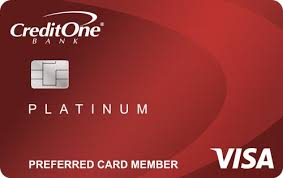

# Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.
 


# Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label.

# Following main steps were used:
* Fill missing values with mode
* Find correlation between features
* Oversample data set
* Use scaling (StandardScaler)
* Do ramdomizedSearchCV to select initialized parameters
* Plot learning curves over multiple iterations
* Plot validation curves over multiple iterations


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data using two data sources

In [ ]:
app = pd.read_csv("../input/credit-card-approval-prediction/application_record.csv")
crecord = pd.read_csv("../input/credit-card-approval-prediction/credit_record.csv")

* Using different methods to understand data
* data is complex and both dataset need some kind of transformation before analysis
* datasets are indivudally dealt with and then eventually compiled using joins

In [ ]:
app.info()

In [ ]:
crecord.info()

In [ ]:
app['ID'].nunique() # the total rows are 438,557. This means it has duplicates

In [ ]:
crecord['ID'].nunique() 
# this has around 43,000 unique rows as there are repeating entries for different monthly values and status.

In [ ]:
len(set(crecord['ID']).intersection(set(app['ID']))) # checking to see how many records match in two datasets

In [ ]:
sns.heatmap(app.isnull()) # checking for null values. Seems like occupation_type has many

In [ ]:
sns.heatmap(crecord.isnull()) # checking for null values. All good here!

In [ ]:
app = app.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [ ]:
app.drop('OCCUPATION_TYPE', axis=1, inplace=True) 
#we identified earlier that occupation_type has many missing values
# we will drop this column

In [ ]:
ot = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
#we are filtering the columns that have non numeric values to see if they are useful

In [ ]:
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS

In [ ]:
num_type

In [ ]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

#this is just to see what each column is. 
#It seems that all of them are important since there is very fine classifcation in each column.
# their effectiveness cannot be judged at this moment so we convert all of them to numeric values.

In [ ]:
app.head(10)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# oe = OneHotEncoder(handle_unknown='ignore')
# for x in object_type:
#     app[x] = oe.fit_transform(app[x])
# we have transformed all the non numeric data columns into data columns

#LabelEncoder:
le = LabelEncoder()
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])

In [ ]:
app.head(10)

In [ ]:
app[num_type].head()
# We will look at numeric columns and see if there is anything that needs to be changed. 

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[0][2], color= 'orange')
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[2][2])

There are outliers in 3 columns.
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS

* We need to remove these outliers to make sure they do not affect our model results. 
* We will now remove these outliers. 

In [ ]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [ ]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [ ]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

In [ ]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[0][2], color= 'orange')

sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[2][2])

In [ ]:
crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID','Months from today'], ascending=True)
crecord.head(10)
# we calculated months from today column to see how much old is the month
# we also sort the data according to ID and Months from today columns. 

In [ ]:
crecord['STATUS'].value_counts() 
# performed a value count on status to see how many values exist of each type

In [ ]:
crecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)
# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model

In [ ]:
crecord['STATUS'].value_counts(normalize=True) 
# there is a problem here
# the data is oversampled for the labels
# 0 are 99%
# 1 are only 1% in the whole dataset
# we will need to address the oversampling issue in order to make sense of our analysis
# this will be done after when we combine both the datasets
# so first we will join the datasets

In [ ]:
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head() 
#we are grouping the data in crecord by ID so that we can join it with app

In [ ]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
# no that this is joined, we will solve over sampling issue

df.info() # checking for number of rows. 
# there are 9516 rows.

In [ ]:
df.info() # checking for number of rows. 
# there are 9516 rows.

# find correlation

In [ ]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels

In [ ]:
y

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# we create the test train split first

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [ ]:
X_scaled.mean(axis=0)

In [ ]:
X_scaled.std(axis=0)

In [ ]:
X_test_scaled.mean(axis=0)

In [ ]:
X_test_scaled.std(axis=0)

In [ ]:
X_scaled

In [ ]:
X_test_scaled

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [ ]:
y_train.value_counts()

In [ ]:
y_balanced.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
y_test_balanced.value_counts()

* We notice in the value counts above that label types are now balanced
* the problem of oversampling is solved now
* we will now implement different models to see which one performs the best

# Algorithms code start below


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
!pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:

# classifiers = {
#     "LogisticRegression" : LogisticRegression(),
#     "KNeighbors" : KNeighborsClassifier(),
#     "SVC" : SVC(),
#     "DecisionTree" : DecisionTreeClassifier(),
#     "RandomForest" : RandomForestClassifier(),
#     "XGBoost" : XGBClassifier(),
#     "MLPClassifier" : MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)
# }

In [ ]:
# %%time
# train_scores = []
# test_scores = []

# for key, classifier in classifiers.items():
#     classifier.fit(X_balanced, y_balanced)
#     train_score = classifier.score(X_balanced, y_balanced)
#     train_scores.append(train_score)
#     test_score = classifier.score(X_test_balanced, y_test_balanced)
#     test_scores.append(test_score)

# print(train_scores)
# print(test_scores)

# [0.635392829900839, 0.984515636918383, 0.9175438596491228, 0.9954233409610984, 0.9954233409610984, 0.9950419527078566, 0.7806254767353166]
# [0.5962633451957295, 0.8119217081850534, 0.8597864768683274, 0.8282918149466192, 0.8572953736654805, 0.9403914590747331, 0.697508896797153]
# CPU times: user 27.2 s, sys: 256 ms, total: 27.5 s
# Wall time: 18.7 s

# Decision tree related assignment tasks

doing random search first step
source: https://gist.github.com/otaviomguerra/51df7a4cff28f92de7105f12a0724115


In [ ]:
%%time


param_dist = {"max_depth": randint(1, 30),
              "max_features": randint(1, 16),
              "min_samples_leaf": randint(1, 16),
              "criterion": ["gini"]}
tree = DecisionTreeClassifier(random_state=0)
tree_cv = RandomizedSearchCV(tree, param_dist, cv=3)
tree_cv.fit(X_balanced,y_balanced)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Building initial tree based on parameters from randomsearchcv

In [ ]:
%%time
prediction = tree_cv.predict(X_test_balanced)


In [ ]:
%%time

print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

Source:https://www.geeksforgeeks.org/using-learning-curves-ml/
# Learning curve: iteration 1

In [ ]:
def plot_learning_curve(estimator):
    sizes, training_scores, testing_scores , fit_times, _= learning_curve(estimator, X_balanced, y_balanced, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 100), return_times=True) 
    # Mean and Standard Deviation of training scores 
    mean_training = np.mean(training_scores, axis=1) 
    Standard_Deviation_training = np.std(training_scores, axis=1) 

    # Mean and Standard Deviation of testing scores 
    mean_testing = np.mean(testing_scores, axis=1) 
    Standard_Deviation_testing = np.std(testing_scores, axis=1) 
    
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    _, axes = plt.subplots(1, 2, figsize=(20, 5))

    # dotted blue line is for training scores and green line is for cross-validation score 
    axes[0].plot(sizes, mean_training, '--', color="b",  label="Training score") 
    axes[0].plot(sizes, mean_testing, color="g", label="Cross-validation score") 

    # Drawing plot 
#     plt.title("LEARNING CURVE FOR MLP Classifier") 
    axes[0].set_title("LEARNING CURVE FOR DT Classifier")
    axes[0].set_xlabel("Training Set Size"), axes[0].set_ylabel("Accuracy Score"), axes[0].legend(loc="best") 
    
    axes[1].grid()
#     axes[1].plot(fit_times_mean, mean_testing, 'o-')
#     axes[1].set_xlabel("fit_times")
#     axes[1].set_ylabel("Score")

    axes[1].plot(sizes, fit_times_mean, 'o-')
    axes[1].set_xlabel("Training Set Size")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Performance of the model")
    
    
    return plt

In [ ]:
%%time
import sklearn.tree as tree
fig = plt.figure(figsize=(25,20), dpi=800)
#source: https://datascience.stackexchange.com/questions/47852/visualizing-decision-tree-with-feature-names
# tree.plot_tree(model) 
# fig.savefig("decistion_tree.png")

model = tree_cv.best_estimator_

dt_feature_names = list(X_balanced.columns)
dt_target_names = [str(s) for s in y_balanced.unique()]
tree.export_graphviz(model, out_file='tree_Iteration1_after_randomizedsearchcv.png', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree_Iteration1_after_randomizedsearchcv.png')
Image(graph.create_png())

In [ ]:
%%time
plot_learning_curve(tree_cv.best_estimator_)

Trying validation curve for depth parameter
source: https://datascience.stackexchange.com/questions/26918/validation-curve-unlike-sklearn-sample

In [ ]:
def plot_validation_curve(param, param_range,estimator):
#     param_range = np.arange(1, 41, 2)
    train_scores, test_scores = validation_curve(estimator, X_balanced, y_balanced, param_name=param, cv=10, param_range=param_range,n_jobs=-1, scoring="accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title("Validation Curve with DecisionTree")
    plt.xlabel(param)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="r")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")

    plt.legend(loc="best")
    param_range = np.arange(1, param_range.max(), 2)
#     plt.xticks(param_range)
    plt.show()

In [ ]:
%%time
param_range = np.arange(1, 41, 2)
param_name="max_depth"
plot_validation_curve(param_name,param_range,tree_cv.best_estimator_)

# Findings: it seems deepth more than 21 doesnt improve score significantly so next iteration i can try changing depth to 21.

In [ ]:
%%time
tree_cv.best_params_['max_depth'] = 5
dt_iter1=DecisionTreeClassifier(random_state=0)
dt_iter1.set_params(**tree_cv.best_params_)
model = dt_iter1.fit(X_balanced, y_balanced)
prediction = dt_iter1.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
tree_cv.best_params_['max_depth'] = 15
dt_iter1=DecisionTreeClassifier(random_state=0)
dt_iter1.set_params(**tree_cv.best_params_)
model = dt_iter1.fit(X_balanced, y_balanced)
prediction = dt_iter1.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
tree_cv.best_params_['max_depth'] = 21
dt_iter1=DecisionTreeClassifier(random_state=0)
dt_iter1.set_params(**tree_cv.best_params_)
model = dt_iter1.fit(X_balanced, y_balanced)
prediction = dt_iter1.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

Accuracy has improved as mentioned above

# Iteration 2

In [ ]:
%%time
plot_learning_curve(dt_iter1)

In [ ]:
%%time
param_range = np.arange(1, 16, 1)
param_name="max_features"
plot_validation_curve(param_name,param_range,dt_iter1)

Findings: As learning curve shows its a good fit and validation curve shows for max_features that its improves at 10 and after that it decreases. so i will choose the min value here which is 10

In [ ]:
%%time
params=dt_iter1.get_params()
params['max_features']=4
dt_iter2=DecisionTreeClassifier(random_state=0)
dt_iter2.set_params(**params)
model = dt_iter2.fit(X_balanced, y_balanced)
prediction = dt_iter2.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
params=dt_iter1.get_params()
params['max_features']=10
dt_iter2=DecisionTreeClassifier(random_state=0)
dt_iter2.set_params(**params)
model = dt_iter2.fit(X_balanced, y_balanced)
prediction = dt_iter2.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
params=dt_iter1.get_params()
params['max_features']=14
dt_iter2=DecisionTreeClassifier(random_state=0)
dt_iter2.set_params(**params)
model = dt_iter2.fit(X_balanced, y_balanced)
prediction = dt_iter2.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

> # Iteration 3

In [ ]:
%%time
plot_learning_curve(dt_iter2)

In [ ]:
%%time
param_range = np.arange(1, 40, 1)
param_name="min_samples_leaf"
plot_validation_curve(param_name,param_range,dt_iter2)

Findings: As learning curve shows its a good fit and validation curve shows for min_samples_leaf that score decreases as min_samples_leaf increases. so i will choose min_samples_leaf=1

In [ ]:
%%time
params=dt_iter2.get_params()
params['min_samples_leaf']=15
dt_iter3=DecisionTreeClassifier(random_state=0)
dt_iter3.set_params(**params)
model = dt_iter3.fit(X_balanced, y_balanced)
prediction = dt_iter3.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
params=dt_iter2.get_params()
params['min_samples_leaf']=25
dt_iter3=DecisionTreeClassifier(random_state=0)
dt_iter3.set_params(**params)
model = dt_iter3.fit(X_balanced, y_balanced)
prediction = dt_iter3.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
params=dt_iter2.get_params()
params['min_samples_leaf']=1
dt_iter3=DecisionTreeClassifier(random_state=0)
dt_iter3.set_params(**params)
model = dt_iter3.fit(X_balanced, y_balanced)
prediction = dt_iter3.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
plot_learning_curve(dt_iter3)

 # Iteration 4


In [ ]:
# %%time
# plot_learning_curve(dt_iter3)

In [ ]:
%%time
param_range = np.arange(0, 600, 50)

# print(type(out1))
param_name="max_leaf_nodes"
plot_validation_curve(param_name,param_range,dt_iter3)

max_leaf_nodes with 200 reveals best as ideally its plaeatuing after 200

In [ ]:
%%time
params=dt_iter3.get_params()
params['max_leaf_nodes']=100
dt_iter4=DecisionTreeClassifier(random_state=0)
dt_iter4.set_params(**params)
model = dt_iter4.fit(X_balanced, y_balanced)
prediction = dt_iter4.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
params=dt_iter3.get_params()
params['max_leaf_nodes']=300
dt_iter4=DecisionTreeClassifier(random_state=0)
dt_iter4.set_params(**params)
model = dt_iter4.fit(X_balanced, y_balanced)
prediction = dt_iter4.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
params=dt_iter3.get_params()
params['max_leaf_nodes']=200
dt_iter4=DecisionTreeClassifier(random_state=0)
dt_iter4.set_params(**params)


In [ ]:
%%time
model = dt_iter4.fit(X_balanced, y_balanced)


In [ ]:
%%time
prediction = dt_iter4.predict(X_test_balanced)

In [ ]:

print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
%%time
plot_learning_curve(dt_iter4)

# Iter 5 Decision tree pruning

source: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [ ]:
%%time
# dt2 = DecisionTreeClassifier(random_state=0)
path = dt_iter4.cost_complexity_pruning_path(X_balanced, y_balanced)
model = dt_iter4.fit(X_balanced, y_balanced)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
%%time
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_balanced, y_balanced)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
%%time
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
%%time
train_scores = [clf.score(X_balanced, y_balanced) for clf in clfs]
test_scores = [clf.score(X_test_balanced, y_test_balanced) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Conclusion: ccp_alpha=0.001125 seems to be maximizing the testing accuracy. Lets rerun with this setting.

In [ ]:
%%time
params=dt_iter4.get_params()
params['ccp_alpha']=0.001125
dt_iter5=DecisionTreeClassifier(random_state=0)
dt_iter5.set_params(**params)
model = dt_iter5.fit(X_balanced, y_balanced)
prediction = dt_iter5.predict(X_test_balanced)
print(confusion_matrix(y_test_balanced, prediction))
print(classification_report(y_test_balanced, prediction))

In [ ]:
dt_iter5

In [ ]:
%%time
plot_learning_curve(dt_iter5)

### Grid search for DT
source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

In [ ]:
%%time

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=0),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X_balanced, y_balanced)
results = gs.cv_results_   

In [ ]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

# Another grid serach attempt
source: https://medium.com/analytics-vidhya/decisiontree-classifier-working-on-moons-dataset-using-gridsearchcv-to-find-best-hyperparameters-ede24a06b489


In [ ]:
# %%time

# #params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
# params = { "criterion" :['gini'],"max_depth": range(1,41),"max_features":range(1,16),"min_samples_leaf":range(1,40),"max_leaf_nodes":range(1,40)}
# grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),params ,n_jobs=-1,  verbose=0, cv=3)
# grid_search_cv.fit(X_balanced, y_balanced)

In [ ]:
# Below code takes a long time to evaluate in hours!
# %%time
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# #params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], }
# params = { "criterion" :['gini'],"max_depth": range(1,27),"min_samples_split":range(1,10),"min_samples_leaf":range(1,5), 'ccp_alpha': np.arange(0, 1, 0.001).tolist()}
# grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0), params, verbose=0, cv=3,n_jobs=-1)
# grid_search_cv.fit(X_balanced, y_balanced)    

In [ ]:
# grid_search_cv.best_estimator_

In [ ]:
# %%time
# # dt4 = DecisionTreeClassifier(**grid_search_cv.best_estimator_)
# # model = dt4.fit(X_balanced, y_balanced)
# model = grid_search_cv.best_estimator_.fit(X_balanced, y_balanced)
# prediction = grid_search_cv.best_estimator_.predict(X_test_balanced)

# print(confusion_matrix(y_test_balanced, prediction))
# print(classification_report(y_test_balanced, prediction))

In [ ]:
# text_representation = tree.export_text(dt3)
# print(text_representation)
# #source: https://mljar.com/blog/visualize-decision-tree/